###### Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #Visualization
import matplotlib.pyplot as plt #Visualization
from sklearn.preprocessing import StandardScaler #Standardization
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier #KNN Classifier
from sklearn.metrics import confusion_matrix 

###### Load Data

In [2]:
xData = pd.read_csv('../Data/Train.csv')
yData = pd.read_csv('../Data/Test.csv')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(xData,yData,random_state=24)

In [4]:
y_train.shape

(5306, 1)

In [5]:
tl = TomekLinks(sampling_strategy='majority')
x_tl, y_tl = tl.fit_resample(X_train,y_train)
print('Original dataset shape', y_train.value_counts())
print('Resample dataset shape', y_tl.value_counts())

Original dataset shape STATUS
0         5282
1           24
dtype: int64
Resample dataset shape STATUS
0         5282
1           24
dtype: int64


In [6]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_tl, y_tl)
print('Original dataset shape', y_tl.value_counts())
print('Resample dataset shape', y_smote.value_counts())

Original dataset shape STATUS
0         5282
1           24
dtype: int64
Resample dataset shape STATUS
0         5282
1         5282
dtype: int64


###### Modeling

In [7]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_smote, y_smote)
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))
confusion_matrix(y_test, y_pred)

D:\programfiles\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\programfiles\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.996608253250424


D:\programfiles\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[1758,    6],
       [   0,    5]], dtype=int64)

In [9]:
clf = RandomForestClassifier(max_depth=2, random_state=10)
clf.fit(x_smote, y_smote)
y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))
confusion_matrix(y_test, y_pred)

C:\Users\amr_a\AppData\Local\Temp\ipykernel_35408\4169581641.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_smote, y_smote)


0.9140757490107405


array([[1612,  152],
       [   0,    5]], dtype=int64)

###### Feature Selection

In [16]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

selector = SelectFromModel(rf(n_estimators = 100, random_state = 0))
selector.fit(x_smote, y_smote)
support = selector.get_support()
features = x_smote.loc[:, support].columns.tolist()
print(features)

D:\programfiles\anaconda\lib\site-packages\sklearn\feature_selection\_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Pensioner', 'NAME_FAMILY_STATUS_Married', 'OCCUPATION_TYPE_Laborers', 'OCCUPATION_TYPE_Managers']


In [17]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(10,15))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

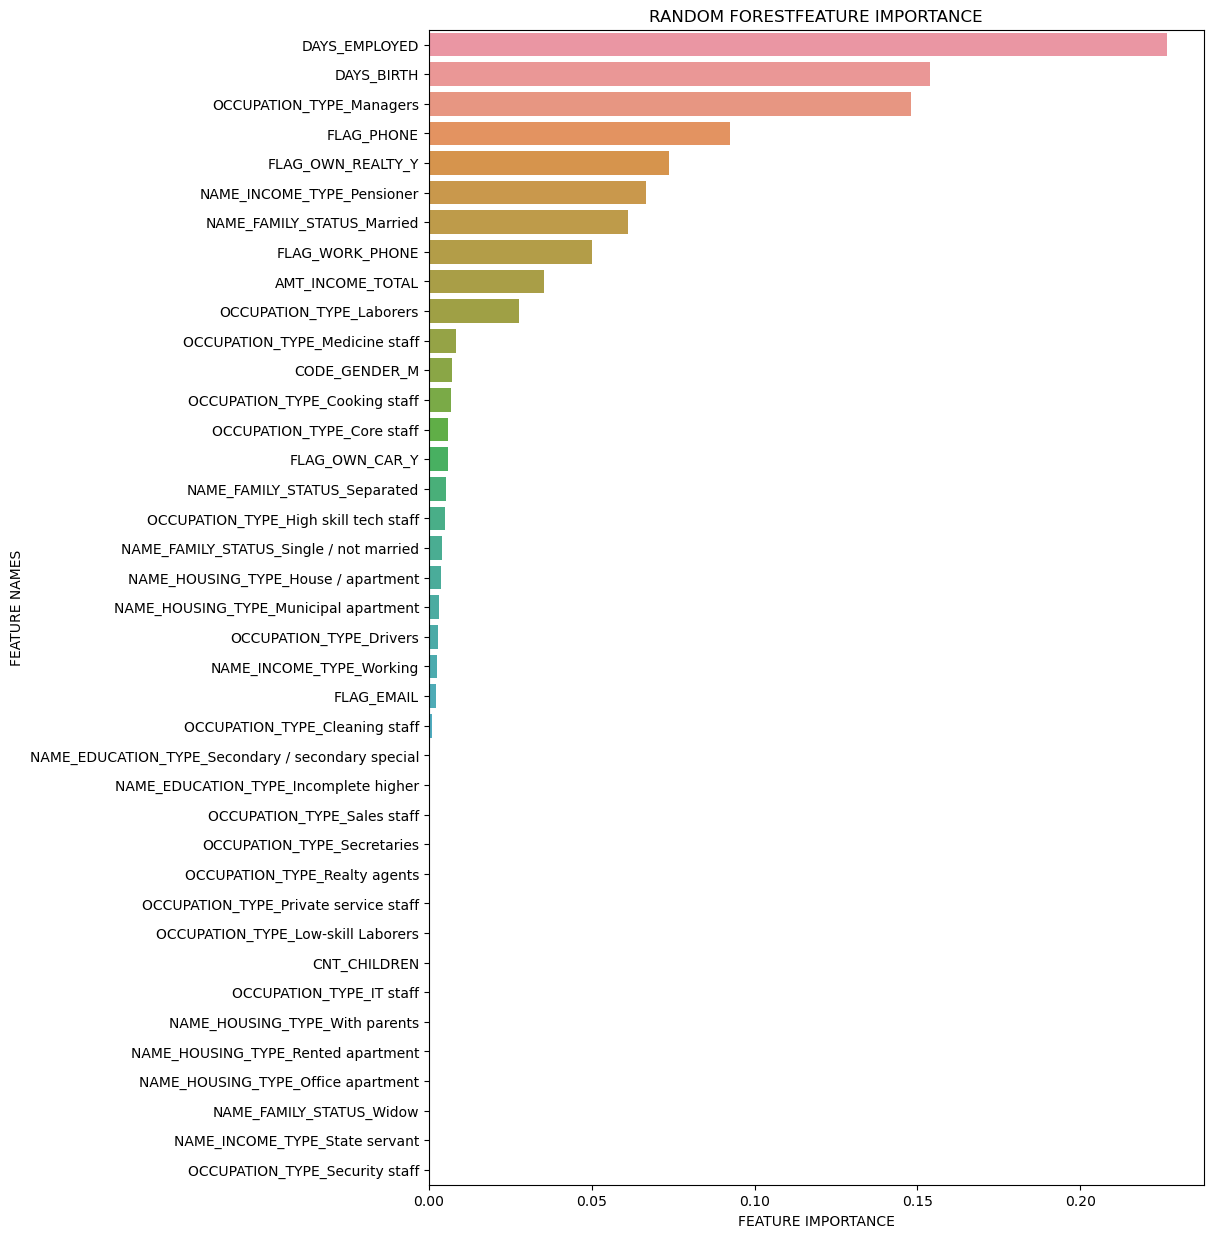

In [18]:
plot_feature_importance(clf.feature_importances_,X_train.columns,'RANDOM FOREST')
